In [43]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ab2a73486f9ef38bcff8fef20b04581


In [44]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [45]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [46]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [47]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [48]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [49]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [50]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | saskylakh
Processing Record 2 of Set 13 | san patricio
Processing Record 3 of Set 13 | honolulu
Processing Record 4 of Set 13 | hilo
Processing Record 5 of Set 13 | avera
Processing Record 6 of Set 13 | tasiilaq
Processing Record 7 of Set 13 | hovd
Processing Record 8 of Set 13 | barrow
Processing Record 9 of Set 13 | cazaje
City not found. Skipping...
Processing Record 10 of Set 13 | kapaa
Processing Record 11 of Set 13 | kayerkan
Processing Record 12 of Set 13 | nizhneyansk
City not found. Skipping...
Processing Record 13 of Set 13 | gulshat
City not found. Skipping...
Processing Record 14 of Set 13 | kurali
Processing Record 15 of Set 13 | arica
Processing Record 16 of Set 13 | banposh
Processing Record 17 of Set 13 | fortuna
Processing Record 18 of Set 13 | puerto ayora
Processing Record 19 of Set 13 | albany
Processing Record 20 of Set 13 | burica
City not found. Skipping...
Processing Record 21 of Set 13 | barentsburg
City not found. Skipping...
Pr

Processing Record 37 of Set 16 | summerside
Processing Record 38 of Set 16 | manaus
Processing Record 39 of Set 16 | north bend
Processing Record 40 of Set 16 | hami
Processing Record 41 of Set 16 | airai
Processing Record 42 of Set 16 | hirara
Processing Record 43 of Set 16 | grand river south east
City not found. Skipping...
Processing Record 44 of Set 16 | shetpe
Processing Record 45 of Set 16 | balad
Processing Record 46 of Set 16 | jati
Processing Record 47 of Set 16 | ostersund
Processing Record 48 of Set 16 | poum
Processing Record 49 of Set 16 | komsomolskiy
Processing Record 50 of Set 16 | nanyuki
Processing Record 1 of Set 17 | pacific grove
Processing Record 2 of Set 17 | qasigiannguit
Processing Record 3 of Set 17 | ixtapa
Processing Record 4 of Set 17 | ust-kulom
Processing Record 5 of Set 17 | ambilobe
Processing Record 6 of Set 17 | flin flon
Processing Record 7 of Set 17 | bogande
Processing Record 8 of Set 17 | talnakh
Processing Record 9 of Set 17 | nemuro
Processing 

Processing Record 20 of Set 20 | merauke
Processing Record 21 of Set 20 | sao geraldo do araguaia
Processing Record 22 of Set 20 | kang
Processing Record 23 of Set 20 | wulanhaote
City not found. Skipping...
Processing Record 24 of Set 20 | nador
Processing Record 25 of Set 20 | micheweni
Processing Record 26 of Set 20 | loralai
Processing Record 27 of Set 20 | christchurch
Processing Record 28 of Set 20 | dwarahat
Processing Record 29 of Set 20 | murgab
Processing Record 30 of Set 20 | lhokseumawe
Processing Record 31 of Set 20 | skjervoy
Processing Record 32 of Set 20 | yaan
Processing Record 33 of Set 20 | asau
Processing Record 34 of Set 20 | brae
Processing Record 35 of Set 20 | morehead
Processing Record 36 of Set 20 | suluq
Processing Record 37 of Set 20 | sydney
Processing Record 38 of Set 20 | oktyabrskiy
Processing Record 39 of Set 20 | rocha
Processing Record 40 of Set 20 | santa maria
Processing Record 41 of Set 20 | meyungs
City not found. Skipping...
Processing Record 42 

Processing Record 8 of Set 24 | barranca
Processing Record 9 of Set 24 | togur
Processing Record 10 of Set 24 | krasnoborsk
Processing Record 11 of Set 24 | filadelfia
Processing Record 12 of Set 24 | kloulklubed
Processing Record 13 of Set 24 | makat
Processing Record 14 of Set 24 | chapais
Processing Record 15 of Set 24 | pearl
Processing Record 16 of Set 24 | lysyye gory
Processing Record 17 of Set 24 | lokosovo
Processing Record 18 of Set 24 | kekri
Processing Record 19 of Set 24 | kodino
Processing Record 20 of Set 24 | urucui
Processing Record 21 of Set 24 | vadlapudi
Processing Record 22 of Set 24 | taseyevo
Processing Record 23 of Set 24 | miraflores
Processing Record 24 of Set 24 | paramount
Processing Record 25 of Set 24 | kalabo
Processing Record 26 of Set 24 | grand centre
City not found. Skipping...
Processing Record 27 of Set 24 | diego de almagro
Processing Record 28 of Set 24 | mizpe ramon
City not found. Skipping...
Processing Record 29 of Set 24 | chenghai
Processing 

In [51]:
len(city_data)

578

In [52]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,-17.68,83,99,13.78,RU,2021-01-10 17:44:24
1,San Patricio,28.0170,-97.5169,53.60,100,90,24.16,US,2021-01-10 17:46:53
2,Honolulu,21.3069,-157.8583,73.40,78,20,4.79,US,2021-01-10 17:50:00
3,Hilo,19.7297,-155.0900,66.20,68,40,5.75,US,2021-01-10 17:46:43
4,Avera,33.1940,-82.5271,50.00,50,1,6.91,US,2021-01-10 17:46:44


In [53]:
#reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2021-01-10 17:44:24,71.9167,114.0833,-17.68,83,99,13.78
1,San Patricio,US,2021-01-10 17:46:53,28.0170,-97.5169,53.60,100,90,24.16
2,Honolulu,US,2021-01-10 17:50:00,21.3069,-157.8583,73.40,78,20,4.79
3,Hilo,US,2021-01-10 17:46:43,19.7297,-155.0900,66.20,68,40,5.75
4,Avera,US,2021-01-10 17:46:44,33.1940,-82.5271,50.00,50,1,6.91


In [54]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [55]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

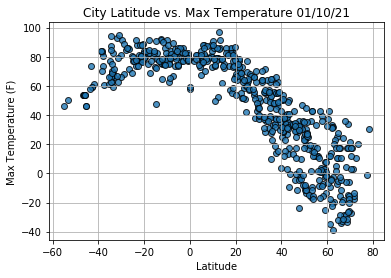

In [56]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

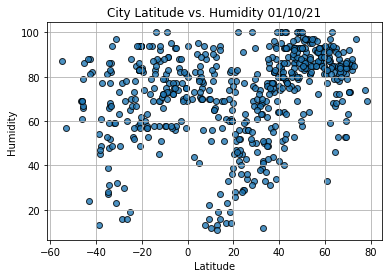

In [57]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

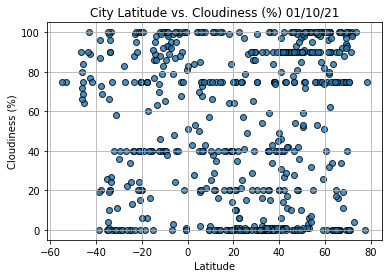

In [58]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

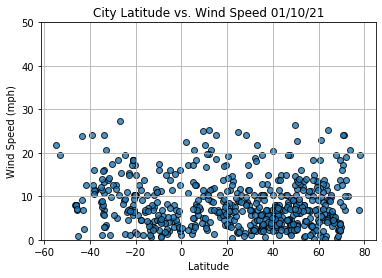

In [59]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylim(0, 50)
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [66]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [67]:
index13 = city_data_df.loc[13]
index13

City                      Fortuna
Country                        US
Date          2021-01-10 17:46:55
Lat                       40.5982
Lng                      -124.157
Max Temp                       50
Humidity                      100
Cloudiness                     90
Wind Speed                   5.75
Name: 13, dtype: object

In [68]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4       True
       ...  
573     True
574     True
575     True
576    False
577     True
Name: Lat, Length: 578, dtype: bool

In [69]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2021-01-10 17:44:24,71.9167,114.0833,-17.68,83,99,13.78
1,San Patricio,US,2021-01-10 17:46:53,28.0170,-97.5169,53.60,100,90,24.16
2,Honolulu,US,2021-01-10 17:50:00,21.3069,-157.8583,73.40,78,20,4.79
3,Hilo,US,2021-01-10 17:46:43,19.7297,-155.0900,66.20,68,40,5.75
4,Avera,US,2021-01-10 17:46:44,33.1940,-82.5271,50.00,50,1,6.91


In [70]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [71]:
northern_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2021-01-10 17:44:24,71.9167,114.0833,-17.68,83,99,13.78
1,San Patricio,US,2021-01-10 17:46:53,28.0170,-97.5169,53.60,100,90,24.16
2,Honolulu,US,2021-01-10 17:50:00,21.3069,-157.8583,73.40,78,20,4.79
3,Hilo,US,2021-01-10 17:46:43,19.7297,-155.0900,66.20,68,40,5.75
4,Avera,US,2021-01-10 17:46:44,33.1940,-82.5271,50.00,50,1,6.91
5,Tasiilaq,GL,2021-01-10 17:44:26,65.6145,-37.6368,17.60,53,75,4.54
6,Hovd,MN,2021-01-10 17:45:46,48.0056,91.6419,-2.45,79,42,2.17
7,Barrow,US,2021-01-10 17:46:47,71.2906,-156.7887,3.20,85,90,6.91
8,Kapaa,US,2021-01-10 17:46:38,22.0752,-159.3190,66.99,100,40,8.05
9,Kayerkan,RU,2021-01-10 17:53:28,69.3497,87.7602,-14.71,81,94,3.38


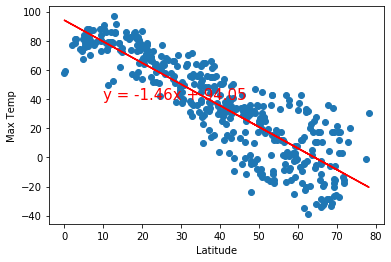

In [91]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        n for Maximum Temperature', 'Max Temp',(10,40))

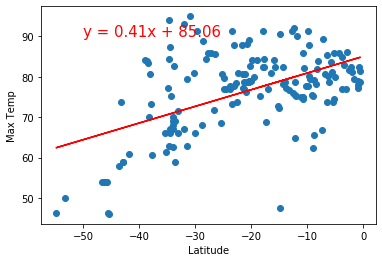

In [90]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        n for Maximum Temperature', 'Max Temp',(-50,90))

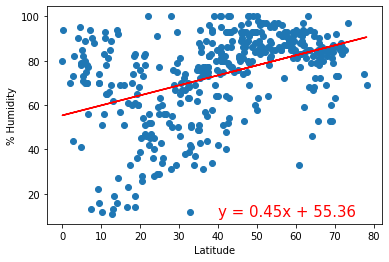

In [89]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        n for % Humidity', '% Humidity',(40,10))

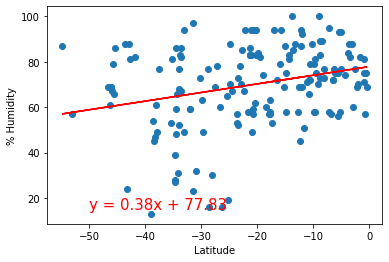

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        n for % Humidity', '% Humidity',(-50,15))

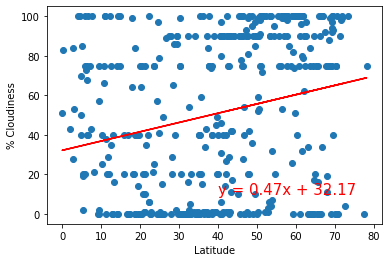

In [87]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        n for % Cloudiness', '% Cloudiness',(40,10))

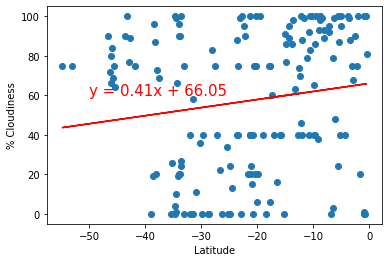

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        n for % Cloudiness', '% Cloudiness',(-50,60))

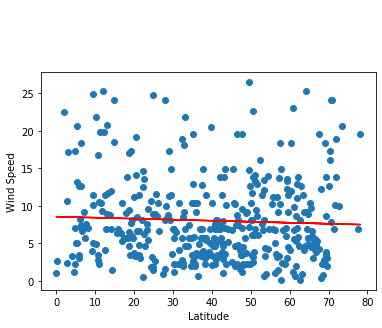

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        n for Wind Speed', 'Wind Speed',(40,35))

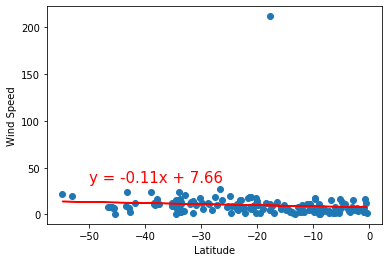

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        n for Wind Speed', 'Wind Speed',(-50,35))